## WP 1

## EDA

In [1]:
# IMPORT LIBRARY
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from bayes_opt import BayesianOptimization
from imblearn.combine import SMOTETomek


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## load dataset

In [2]:
# Load Dataset

file = ('stroke_dataset.csv')
data = pd.read_csv(file)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Cek info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# cek deskripsi data
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Cek nilai hilang pada dataset
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## MENGISI DATA HILANG DENGAN MEDIAN

In [6]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
##CEK DATA SETELAH DI ISI
print(data.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [8]:
# cek duplikasi data
data.duplicated().sum()

np.int64(0)

In [9]:
# cek isian dari dataset

# gender
print(data['gender'].unique())

# worktype
print(data['work_type'].unique())

# Residence Type
print(data['Residence_type'].unique())

# Smoking Status
print(data['smoking_status'].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


## HAPUS DATA YANG TIDAK TERPAKAI "OTHER"

In [10]:
# Menggahapus Nilai "Other" pada kolom gender
data = data[data['gender'] != 'Other']
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

## CEK KESEIMBANGAN DATA

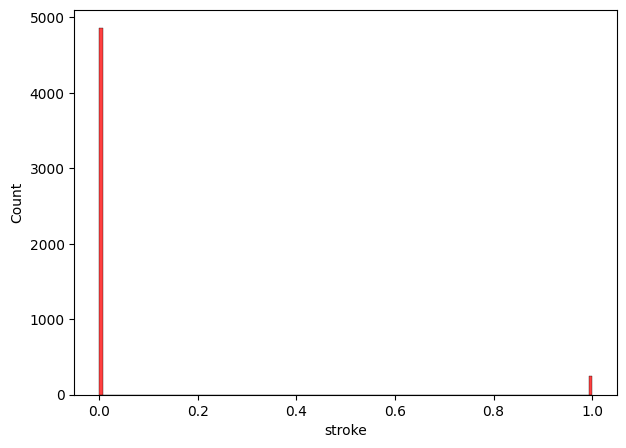

stroke
0    4860
1     249
Name: count, dtype: int64


In [11]:
# cek keseimbangan data
fig, axes = plt.subplots(1,1,figsize=(7,5))

sns.histplot(data = data, x='stroke', color = 'red')
plt.show()
print (data['stroke'].value_counts())

In [12]:
# Sebelum menyeimbangan Data ada beberapa tahapan lagi

#1. hapus kolom tidak berguna seperti ID
data.drop('id', axis=1, inplace=True)

#2. Transformasi Data menggunakan Label encoder
d_list = data.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()
for i in d_list:
    le.fit(data[i])
    data[i] = le.transform(data[i])

C:\Users\HP PAVILION\AppData\Local\Temp\ipykernel_5152\583359724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('id', axis=1, inplace=True)
C:\Users\HP PAVILION\AppData\Local\Temp\ipykernel_5152\583359724.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = le.transform(data[i])
C:\Users\HP PAVILION\AppData\Local\Temp\ipykernel_5152\583359724.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [13]:
# cek info dataset setelah transformasi
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 479.0 KB


In [14]:
# Mengubah type data age menjadi INT 
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 479.0 KB


C:\Users\HP PAVILION\AppData\Local\Temp\ipykernel_5152\2919376904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].astype(int)


In [15]:
# MENENTUKAN LABEL PADA DATASET

X = data.drop('stroke', axis=1)
y = data['stroke']

## MENYEIMBANGKAN DATA DENGAN SMOTEOMEK

In [16]:
# Penyeimbangan Data
balanced = SMOTETomek(random_state=42)

X_resampled, y_resampled = balanced.fit_resample(X, y)

# Cek Jumlah Variabel X dan y Sebelum dan sesudah 
print('Jumlah sampel sebelum hybrid = ', len(X))
print('Jumlah sampel sesudah hybrid = ', len(X_resampled))

Jumlah sampel sebelum hybrid =  5109
Jumlah sampel sesudah hybrid =  9652


## MENYIMPAN DATASET

In [17]:
# Buat Menjadi Data Frame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)
resampled_data.to_csv('dataset_balanced.csv', index=False)

## CEK DATASET SEIMBANG 

In [18]:
# melihat apakah dataset sudah seimbang

data = pd.read_csv('stroke_dataset_balanced.csv')

data['stroke'].value_counts()

FileNotFoundError: [Errno 2] No such file or directory: 'stroke_dataset_balanced.csv'

## PERSIAPAN DATA UNTUK BASE MODEL

In [ ]:
# Pemilihan Variabel Bebas dan independent dari data yang sudah diseimbangakan
X = data.drop('stroke', axis=1)
y = data['stroke']

## MEMBAGI DATA TRAIN DAN TEST

In [ ]:
# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, shuffle=True)

## 

## WP 2

## BASE MODEL 

In [ ]:
# BASE MODEL 
model = AdaBoostClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_estimators=100, algorithm="SAMME", random_state=42
)

In [ ]:
# BASE MODEL - TRAINING
model.fit(X_train, y_train) # MODEL BELAJAR DARI DATA!


In [ ]:
#  BASE MODEL - PREDICTION  
pred = model.predict(X_test)       # MODEL MENCARI DIAGNOSA BARU!


In [ ]:
#  BASE MODEL - EVALUATION
print(model.score(X_test, y_test)) # CEK AKURASI MODEL!

In [ ]:
# IMPORT LIB
from sklearn.metrics import confusion_matrix, classification_report

#  CONFUSION MATRIX 
cn = confusion_matrix(y_test, pred) # Menghitung: Benar vs Salah prediksi

#  VISUALISASI  
sns.heatmap(cn, annot=True) # Gambar matrix dengan angka-angka

## CEK AKURASI PREDIKSI 

In [ ]:
print(classification_report(y_test, pred))

## HYPER PARAMETERTUNING MENGGUNAKAN BAYESIAN OPTIMIZATION

In [ ]:
# 1. Define function untuk Bayesian Optimization dengan error handling
def adaboost_rf_cv(n_estimators, learning_rate, rf_n_estimators, rf_max_depth, rf_min_samples_split):
    """
    Function untuk optimize AdaBoost dengan RandomForest sebagai base estimator
    """
    try:
        # Convert parameters ke integer
        n_estimators = max(1, int(n_estimators))
        rf_n_estimators = max(1, int(rf_n_estimators))
        rf_max_depth = max(1, int(rf_max_depth))
        rf_min_samples_split = max(2, int(rf_min_samples_split))
        learning_rate = max(0.01, learning_rate)  # Pastikan learning_rate > 0
        
        # Cross-validation score dengan F1-macro
        scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_macro', n_jobs=1)
        
        # Return mean score, handle NaN
        score = np.mean(scores)
        return score if not np.isnan(score) else 0.0
        
    except Exception as e:
        print(f"Error in evaluation: {e}")
        return 0.0  # Return 0 jika ada error

In [ ]:
# 2. Define parameter bounds untuk Bayesian Optimization
pbounds = {
    # Parameter AdaBoost
    'n_estimators': (50, 200),        # Jumlah estimator AdaBoost
    'learning_rate': (0.1, 2.0),      # Learning rate AdaBoost
    
    # Parameter RandomForest (base estimator)
    'rf_n_estimators': (50, 200),     # Jumlah tree di RandomForest
    'rf_max_depth': (5, 20),          # Kedalaman maksimal tree
    'rf_min_samples_split': (2, 10),  # Minimal samples untuk split
}

In [ ]:
# 3. Initialize Bayesian Optimizer
optimizer = BayesianOptimization(
    f=adaboost_rf_cv,
    pbounds=pbounds,
    random_state=42
)

In [ ]:
# 4. Perform optimization
print("Starting Bayesian Optimization for AdaBoost + RandomForest...")
print(f"Data shape - X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Data shape - X_test: {X_test.shape}, y_test: {y_test.shape}")

optimizer.maximize(
    init_points=5,   # Random exploration pertama
    n_iter=15        # Kurangi iterasi untuk testing dulu
)